# Digtial Signal Processing Toolkit Demo
---

## Trapezoidal Filtering
According to the pixie manual, the trapezoidal filters have the following basic form:

$LV_{x,k} = - \sum^{k-L-G}_{i=k-2L-G+1} V_i + \sum^{k}_{i=k-L+1}V_i$

Where $V$ is the signal, $L$ is the rise time of the trapezoidal filter and $G$ is the flat top
(gap) of the filter. The total length of the filter is then

$FilterLength = 2 * L + G$

The energy filter is actually a bit more complex than this since it takes into account the decay
constant of the previous signal. Here's an
[excellent article](https://doi.org/10.1109/NSSMIC.2008.4774600) about how the energy filtering is
implemented.

But you're here to see these functions in action. Let's take a peek.

### Necessary imports

In [1]:
from pandas import DataFrame
import matplotlib.pyplot as plt

### Choose our signal from the sample data

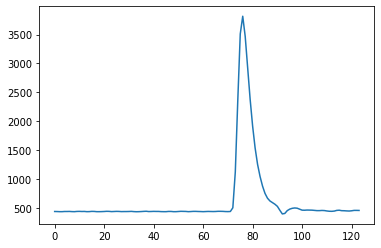

In [2]:
from sample_data import sample_traces as st
signal = st.plastic_scintillator
plt.plot(signal)


### Choose our signal from the sample data

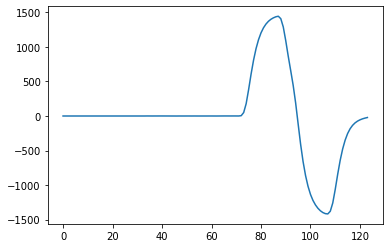

In [3]:
import filtering.trapezoidal_filters as tf

trig_params = {"l": 15, "g": 5, "t": 10}
triggers, trigger_filter = tf.calculate_trigger_filter(signal, trig_params['l'],
                                                    trig_params['g'], trig_params['t'])
baseline = tf.calculate_baseline(signal, triggers[0], trig_params['l'])
plt.plot(trigger_filter)

### Choose our signal from the sample data

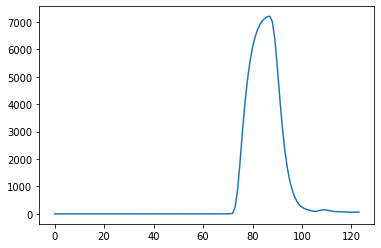

In [4]:
energy_params = {"l": 10, "g": 5, "t": 2.5}
energy_filter_coefficients = tf.calculate_energy_filter_coefficients(energy_params['l'],
                                                                  energy_params['t'])
energy = tf.calculate_energy(signal, baseline, energy_filter_coefficients,
                          tf.calculate_energy_filter_limits(triggers[0], energy_params['l'],
                                                         energy_params['g'], len(signal)))
energy_filter = tf.calculate_energy_filter(signal, energy_params['l'],
                                        energy_params['g'], baseline,
                                        energy_filter_coefficients)
plt.plot(energy_filter)

### Put it all Together

(55.0, 124.0)

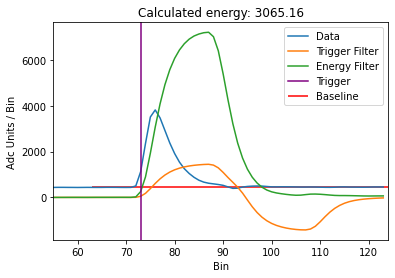

In [5]:
ax = plt.gca()
ax.set(xlabel="Bin", ylabel='Adc Units / Bin', title=f"Calculated energy: {round(energy, 2)}")
DataFrame(signal, columns=['Data']).plot(ax=ax)
DataFrame(trigger_filter, columns=['Trigger Filter']).plot(ax=ax)
DataFrame(energy_filter, columns=["Energy Filter"]).plot(ax=ax)
for trigger in triggers:
    plt.axvline(x=trigger, color='purple', label="Trigger")
plt.hlines(y=baseline, xmin=triggers[0] - 10, xmax=len(signal), colors='red',
           label="Baseline")
ax.legend(loc='best')
ax.set_xlim([round(0.75 * triggers[0]), len(signal)])